In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy as sym
from scipy.integrate import quad
from scipy.integrate import dblquad

In [2]:
def GetIntegral(f, x, y, z, a, b):
    
    xpol,w = np.polynomial.legendre.leggauss(50)
    
    t = np.zeros((len(xpol)))
    
    for i in range(len(xpol)):
        t[i] = 0.5*((b-a)*xpol[i] + a + b)
    
    S = np.zeros((len(xpol)))
    
    for i in range(len(xpol)):
        S[i] = w[i]*f(t[i], x, y, z)
            
    I = np.sum(S)*(b-a)/2.
    
    return I

In [3]:
#def rx(x, y, z): 
    #return (1/(2*np.pi))*quad(fx, 0., 2*np.pi, args = (x, y, z))[0]


def rx(x, y, z): 
    I = GetIntegral(fx, x, y, z, 0., 2*np.pi)
    return (1/(2*np.pi))*I

    
def fx(phi, x, y, z):
    return (x-0.5*np.cos(phi))/((np.square(x) + np.square(y) + np.square(z) + np.square(0.5) - 2*0.5*x*np.cos(phi) - 2*0.5*y*np.sin(phi))**(3/2))

In [4]:
#def ry(x, y, z): 
    #return (1/(2*np.pi))*quad(fy, 0., 2*np.pi, args = (x, y, z))[0]


def ry(x, y, z): 
    I = GetIntegral(fy, x, y, z, 0., 2*np.pi)
    return (1/(2*np.pi))*I
    
    
def fy(phi, x, y, z):
    return (y-0.5*np.sin(phi))/((np.square(x) + np.square(y) + np.square(z) + np.square(0.5) - 2*0.5*x*np.cos(phi) - 2*0.5*y*np.sin(phi))**(3/2))

In [5]:
#def rz(x, y, z): 
    #return (1/(2*np.pi))*quad(fz, 0., 2*np.pi, args = (x, y, z))[0]


def rz(x, y, z): 
    I = GetIntegral(fz, x, y, z, 0., 2*np.pi)
    return (1/(2*np.pi))*I


def fz(phi, x, y, z):
    return z/((np.square(x) + np.square(y) + np.square(z) + np.square(0.5) - 2*0.5*x*np.cos(phi) - 2*0.5*y*np.sin(phi))**(3/2))

In [6]:
a = rx(0.6, 0.6, 1.)
b = ry(0.6, 0.6, 1.)
c = rz(0.6, 0.6, 1.)
print(a)
print(b)
print(c)

0.21152494075605904
0.21152494075606035
0.43864732145178925


In [7]:
N = 6

X = np.linspace(-0.6, 0.6, N)
Y = np.linspace(-0.6, 0.6, N)
Z = np.linspace(-0.6, 0.6, N)

Ex = np.zeros((N, N, N))
Ey = np.zeros((N, N, N))
Ez = np.zeros((N, N, N))
X

array([-0.6 , -0.36, -0.12,  0.12,  0.36,  0.6 ])

In [8]:
A = np.zeros((2, 2))
A[0, 1] = 1
A

array([[0., 1.],
       [0., 0.]])

In [9]:
for i in range(len(X)):
    x = X[i]
    for j in range(len(Y)):
        y = Y[j]
        for k in range(len(Z)):
            z = Z[k]
            Ex[i, j, k] = rx(x, y, z)
            Ey[i, j, k] = ry(x, y, z)
            Ez[i, j, k] = rz(x, y, z)

In [10]:
theta = np.linspace(0., 2*np.pi, 100)
xfunc = lambda x: 0.5*np.cos(x)
yfunc = lambda y: 0.5*np.sin(y)

<IPython.core.display.Javascript object>


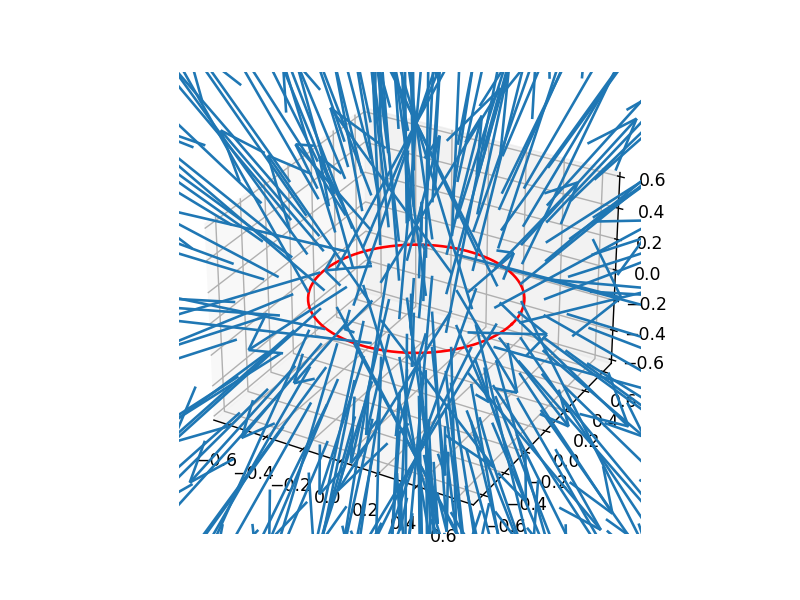

In [11]:
ax = plt.figure().add_subplot(111, projection='3d')

ax.plot(xfunc(theta), yfunc(theta), 0, color='red')

for i in range(len(X)):
    for j in range(len(Y)):
        for k in range(len(Z)):
            ax.quiver(X[i], Y[j], Z[k], Ex[i, j, k], Ey[i, j, k], Ez[i, j, k])

plt.show()

In [12]:
print(Ex[:, :, -1])

[[-0.44648528 -0.53804445 -0.57663105 -0.57663105 -0.53804445 -0.44648528]
 [-0.32282667 -0.3577905  -0.34807361 -0.34807361 -0.3577905  -0.32282667]
 [-0.11532621 -0.11602454 -0.1022882  -0.1022882  -0.11602454 -0.11532621]
 [ 0.11532621  0.11602454  0.1022882   0.1022882   0.11602454  0.11532621]
 [ 0.32282667  0.3577905   0.34807361  0.34807361  0.3577905   0.32282667]
 [ 0.44648528  0.53804445  0.57663105  0.57663105  0.53804445  0.44648528]]


In [13]:
print(Ey[:, :, -1])

[[-0.44648528 -0.32282667 -0.11532621  0.11532621  0.32282667  0.44648528]
 [-0.53804445 -0.3577905  -0.11602454  0.11602454  0.3577905   0.53804445]
 [-0.57663105 -0.34807361 -0.1022882   0.1022882   0.34807361  0.57663105]
 [-0.57663105 -0.34807361 -0.1022882   0.1022882   0.34807361  0.57663105]
 [-0.53804445 -0.3577905  -0.11602454  0.11602454  0.3577905   0.53804445]
 [-0.44648528 -0.32282667 -0.11532621  0.11532621  0.32282667  0.44648528]]
